<a href="https://colab.research.google.com/github/Juanitorivi/UFV-visualizacion/blob/main/Ejercicios_de_clase/Clase18_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1º Número de actual y forecast

In [21]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import files
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go

# Cargar el archivo CSV
file_path = '/content/datos_ejercicio_ventas.csv'
data = pd.read_csv(file_path, sep=",")

# Contar los valores en la columna 'SCENARIO'
scenario_counts = data['SCENARIO'].value_counts()

# Mostrar el resultado
print(scenario_counts)

SCENARIO
AI_forecast    17766
actual           900
Name: count, dtype: int64


2º Horizonte de predicción: es cuando haces una predicción, esta la haces para un número de pasos en el futuro , si estoy en enero y hago una predicción para febrero el horizonte de predicción es solo 1.

In [22]:
# Revisar el tipo de datos de las columnas
print(data.dtypes)

# Asegurarse de que los tipos sean consistentes
# Convertir la columna 'FORECAST_YEAR' a cadena si es necesario
data['FORECAST_YEAR'] = data['FORECAST_YEAR'].astype(str)

COUNTRY           object
SUBBRAND          object
YEAR               int64
MONTH              int64
SCENARIO          object
FORECAST          object
FORECAST_YEAR    float64
AMOUNT           float64
dtype: object


# *Nº PAISES Y PRODUCTOS*

In [23]:
# Contar los valores en la columna 'COUNTRY'
paises_counts = data['COUNTRY'].value_counts()

# Mostrar el resultado
print(paises_counts)

COUNTRY
Great Britain    4008
Netherlands      2476
Hungary          2384
Denmark          2294
Spain            2152
Norway           2062
Czech            1403
Portugal         1179
Italy             708
Name: count, dtype: int64


Podemos observar que hay 9 países distintos

In [24]:
# Contar los valores en la columna 'COUNTRY'
productos_counts = data['SUBBRAND'].value_counts()

# Mostrar el resultado
print(productos_counts)

SUBBRAND
Pepsi Max (L3)        5598
Pepsi Regular (L3)    3636
7up (L3)              2694
Lipton (L3)           2693
7up Free (L3)         2343
Mountain Dew (L3)     1702
Name: count, dtype: int64


# **HORIZONTES DE PREDICCIÓN**


Para ver el horizonte de predicción, nos fijamos en un país y un producto (Portugal, Lipton)

In [25]:
portugal_lipton = data[(data['COUNTRY'] == 'Portugal') & (data['SUBBRAND'] == 'Lipton (L3)')]

# Mostrar las primeras filas del nuevo DataFrame
print(portugal_lipton.head())

      COUNTRY     SUBBRAND  YEAR  MONTH     SCENARIO FORECAST FORECAST_YEAR  \
0    Portugal  Lipton (L3)  2023     12  AI_forecast  AI_P02F        2023.0   
292  Portugal  Lipton (L3)  2023     10       actual      NaN           nan   
454  Portugal  Lipton (L3)  2024      9  AI_forecast  AI_P04F        2023.0   
490  Portugal  Lipton (L3)  2023      7  AI_forecast  AI_P04F        2023.0   
530  Portugal  Lipton (L3)  2023      9  AI_forecast  AI_P06F        2023.0   

           AMOUNT  
0    7.543562e+05  
292  1.206886e+06  
454  7.122028e+05  
490  8.897866e+05  
530  7.676745e+05  



Ahora eliminamos los valores de ACTUAL porque esos no son predicciones sino ventas

In [26]:
# Filtrar los datos para eliminar las filas donde el valor en 'SCENARIO' es 'actual'
portugal_lipton1 = portugal_lipton[portugal_lipton['SCENARIO'] != 'actual']

# Mostrar las primeras filas del nuevo DataFrame
print(portugal_lipton1.head())

      COUNTRY     SUBBRAND  YEAR  MONTH     SCENARIO FORECAST FORECAST_YEAR  \
0    Portugal  Lipton (L3)  2023     12  AI_forecast  AI_P02F        2023.0   
454  Portugal  Lipton (L3)  2024      9  AI_forecast  AI_P04F        2023.0   
490  Portugal  Lipton (L3)  2023      7  AI_forecast  AI_P04F        2023.0   
530  Portugal  Lipton (L3)  2023      9  AI_forecast  AI_P06F        2023.0   
690  Portugal  Lipton (L3)  2025      1  AI_forecast  AI_P09F        2023.0   

            AMOUNT  
0    754356.237194  
454  712202.846157  
490  889786.554294  
530  767674.504724  
690  790023.719723  


In [27]:
portugal_lipton_02 = portugal_lipton1[(portugal_lipton1['FORECAST'] == 'AI_P02F') & (portugal_lipton1['FORECAST_YEAR'] == '2023.0')]

# Mostrar las primeras filas del nuevo DataFrame
print(portugal_lipton_02.head())

       COUNTRY     SUBBRAND  YEAR  MONTH     SCENARIO FORECAST FORECAST_YEAR  \
0     Portugal  Lipton (L3)  2023     12  AI_forecast  AI_P02F        2023.0   
742   Portugal  Lipton (L3)  2023      9  AI_forecast  AI_P02F        2023.0   
953   Portugal  Lipton (L3)  2024      5  AI_forecast  AI_P02F        2023.0   
2311  Portugal  Lipton (L3)  2023      5  AI_forecast  AI_P02F        2023.0   
3353  Portugal  Lipton (L3)  2024      7  AI_forecast  AI_P02F        2023.0   

             AMOUNT  
0     754356.237194  
742   829026.131686  
953   668010.174306  
2311  738743.381537  
3353  903228.434649  


In [28]:
# Contar los valores en la columna 'SCENARIO'
portugal_counts = portugal_lipton_02['SCENARIO'].value_counts()

# Mostrar el resultado
print(portugal_counts)

SCENARIO
AI_forecast    18
Name: count, dtype: int64



Podemos observar que en enero de 2023 hemos realizado 18 puntos de predicciones

# **HISTORICO DE ACTUAL/FORECAST**

Histórico de ACTUALS es la primera y la última predicción de un producto

In [29]:
# Filtrar para obtener solo los escenarios actuales
historico_forecast = portugal_lipton[portugal_lipton['SCENARIO'] == 'actual']

# Combinar YEAR y MONTH en una nueva columna de fecha
historico_forecast['fecha_actual'] = pd.to_datetime(historico_forecast['YEAR'].astype(str) + '-' + historico_forecast['MONTH'].astype(str) + '-01')

# Encontrar la primera fecha solo con mes y año
primera_fecha_actual = historico_forecast['fecha_actual'].min().strftime('%Y-%m')

# Encontrar la última fecha solo con mes y año
ultima_fecha_actual = historico_forecast['fecha_actual'].max().strftime('%Y-%m')

# Mostrar los resultados
print("Primera fecha actual (Año-Mes):", primera_fecha_actual)
print("Última fecha actual (Año-Mes):", ultima_fecha_actual)



Primera fecha actual (Año-Mes): 2023-01
Última fecha actual (Año-Mes): 2024-08


<ipython-input-29-21c62ca49877>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Histórico de FORECAST

In [30]:
# Filtrar para obtener solo los escenarios actuales
historico_forecast_prim = portugal_lipton[portugal_lipton['FORECAST'] == 'AI_P02F']

# Combinar YEAR y MONTH en una nueva columna de fecha
historico_forecast_prim['fecha_actual'] = pd.to_datetime(historico_forecast_prim['YEAR'].astype(str) + '-' + historico_forecast_prim['MONTH'].astype(str) + '-01')

# Encontrar la primera fecha solo con mes y año
primera_fecha_prim = historico_forecast_prim['fecha_actual'].min().strftime('%Y-%m')


# Filtrar para obtener solo los escenarios actuales
historico_forecast_ult = portugal_lipton[portugal_lipton['FORECAST'] == 'AI_PF']

# Combinar YEAR y MONTH en una nueva columna de fecha
historico_forecast_ult['fecha_actual'] = pd.to_datetime(historico_forecast_ult['YEAR'].astype(str) + '-' + historico_forecast_ult['MONTH'].astype(str) + '-01')

# Encontrar la última fecha solo con mes y año
ultima_fecha_ultima = historico_forecast_ult['fecha_actual'].max().strftime('%Y-%m')

# Mostrar los resultados
print("Primera fecha actual (Año-Mes):", primera_fecha_prim)
print("Última fecha actual (Año-Mes):", ultima_fecha_ultima)

Primera fecha actual (Año-Mes): 2023-02
Última fecha actual (Año-Mes): 2024-06


<ipython-input-30-3ec805eae333>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-3ec805eae333>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
# 1. Distribución de ventas por país
ventas_por_pais = data.groupby('COUNTRY')['AMOUNT'].sum().reset_index()
print("Distribución de ventas por país:\n", ventas_por_pais)
fig_ventas_por_pais = px.bar(ventas_por_pais, x='COUNTRY', y='AMOUNT', title='Distribución de ventas por país')
fig_ventas_por_pais.show()



Distribución de ventas por país:
          COUNTRY        AMOUNT
0          Czech  6.384946e+08
1        Denmark  3.173959e+09
2  Great Britain  8.427775e+09
3        Hungary  1.104465e+09
4          Italy  5.058963e+08
5    Netherlands  1.831524e+09
6         Norway  1.858965e+09
7       Portugal  3.871816e+08
8          Spain  2.184936e+08


In [32]:
# 2. Distribución de ventas por año y mes
# Agrupamos los datos por 'YEAR' y 'MONTH' y sumamos las ventas en 'AMOUNT'
ventas_por_mes_ano = data.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

# Creamos una nueva columna 'FECHA' para combinar año y mes en un solo campo
ventas_por_mes_ano['FECHA'] = ventas_por_mes_ano['YEAR'].astype(str) + '-' + ventas_por_mes_ano['MONTH'].astype(str).str.zfill(2)

# Mostramos la distribución de ventas por año y mes
print("Distribución de ventas por año y mes:\n", ventas_por_mes_ano)

fig_ventas_por_mes_ano = px.bar(ventas_por_mes_ano, x='FECHA', y='AMOUNT', title='Distribución de ventas por año y mes')
fig_ventas_por_mes_ano.show()

Distribución de ventas por año y mes:
     YEAR  MONTH        AMOUNT    FECHA
0   2023      1  9.310165e+07  2023-01
1   2023      2  1.612275e+08  2023-02
2   2023      3  2.696923e+08  2023-03
3   2023      4  3.353694e+08  2023-04
4   2023      5  4.550054e+08  2023-05
5   2023      6  5.304364e+08  2023-06
6   2023      7  6.288473e+08  2023-07
7   2023      8  7.474676e+08  2023-08
8   2023      9  7.679450e+08  2023-09
9   2023     10  7.890140e+08  2023-10
10  2023     11  9.085069e+08  2023-11
11  2023     12  1.049411e+09  2023-12
12  2024      1  8.448844e+08  2024-01
13  2024      2  8.408047e+08  2024-02
14  2024      3  1.009033e+09  2024-03
15  2024      4  9.872097e+08  2024-04
16  2024      5  1.065666e+09  2024-05
17  2024      6  1.057691e+09  2024-06
18  2024      7  9.981979e+08  2024-07
19  2024      8  9.357902e+08  2024-08
20  2024      9  7.411355e+08  2024-09
21  2024     10  6.168697e+08  2024-10
22  2024     11  5.632671e+08  2024-11
23  2024     12  5.262705

In [33]:
# 3. Distribución de ventas por marca
# Agrupamos los datos por 'SUBBRAND' (marca) y sumamos las ventas en 'AMOUNT'
ventas_por_marca = data.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()
print("Distribución de ventas por marca:\n", ventas_por_marca)


fig_ventas_por_marca = px.bar(ventas_por_marca, x='SUBBRAND', y='AMOUNT', title='Distribución de ventas por marca')
fig_ventas_por_marca.show()






Distribución de ventas por marca:
              SUBBRAND        AMOUNT
0            7up (L3)  2.917746e+08
1       7up Free (L3)  1.066603e+09
2         Lipton (L3)  1.682028e+09
3   Mountain Dew (L3)  1.316731e+08
4      Pepsi Max (L3)  1.229538e+10
5  Pepsi Regular (L3)  2.679291e+09


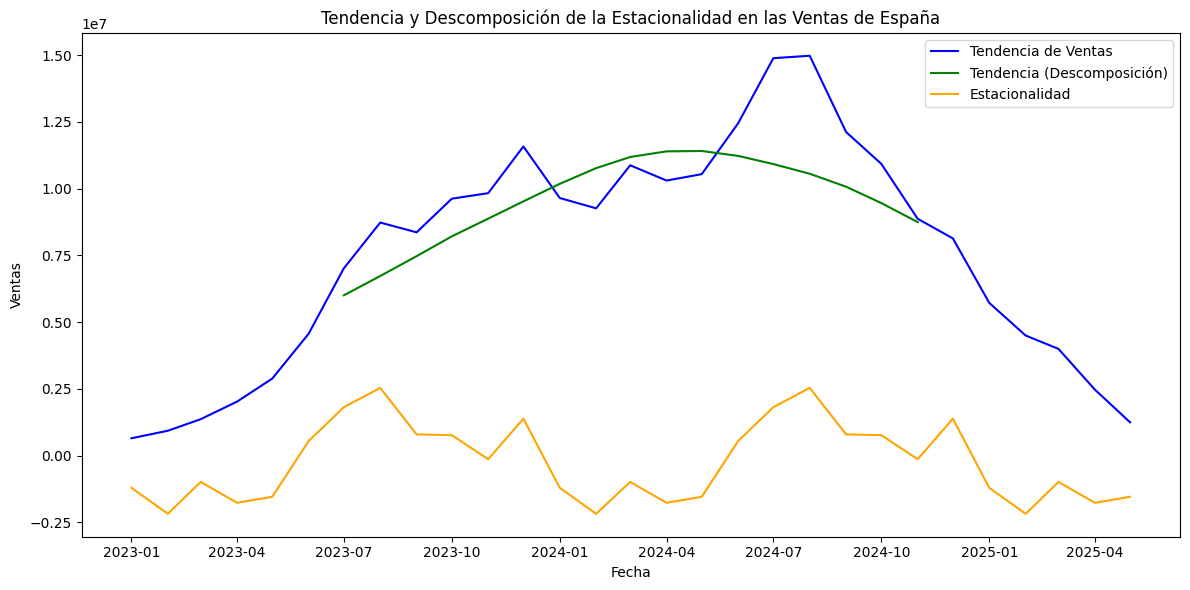

In [34]:

# Filtrar los datos para España, el país con menos ventas
ventas_espana = data[data['COUNTRY'] == 'Spain']

# Agrupar las ventas por año y mes y sumar las cantidades
ventas_espana_agrupadas = ventas_espana.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

# Crear una nueva columna 'FECHA' para combinar año y mes en un solo campo de tipo fecha
ventas_espana_agrupadas['FECHA'] = pd.to_datetime(
    ventas_espana_agrupadas['YEAR'].astype(str) + '-' + ventas_espana_agrupadas['MONTH'].astype(str) + '-01'
)

# Ordenar por fecha
ventas_espana_agrupadas = ventas_espana_agrupadas.sort_values(by='FECHA')

# Configurar el índice de la serie temporal como la columna de fecha
ventas_espana_agrupadas.set_index('FECHA', inplace=True)

# Realizar descomposición estacional
result = seasonal_decompose(ventas_espana_agrupadas['AMOUNT'], model='additive', period=12)

# Crear la figura para mostrar todas las líneas en una sola gráfica
plt.figure(figsize=(12, 6))

# Graficar la tendencia de ventas en España
plt.plot(ventas_espana_agrupadas.index, ventas_espana_agrupadas['AMOUNT'], color='blue', label='Tendencia de Ventas')

# Graficar la tendencia de la descomposición
plt.plot(result.trend, label='Tendencia (Descomposición)', color='green')

# Graficar la estacionalidad de la descomposición
plt.plot(result.seasonal, label='Estacionalidad', color='orange')

# Configuración del gráfico
plt.title('Tendencia y Descomposición de la Estacionalidad en las Ventas de España')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.tight_layout()
plt.show()




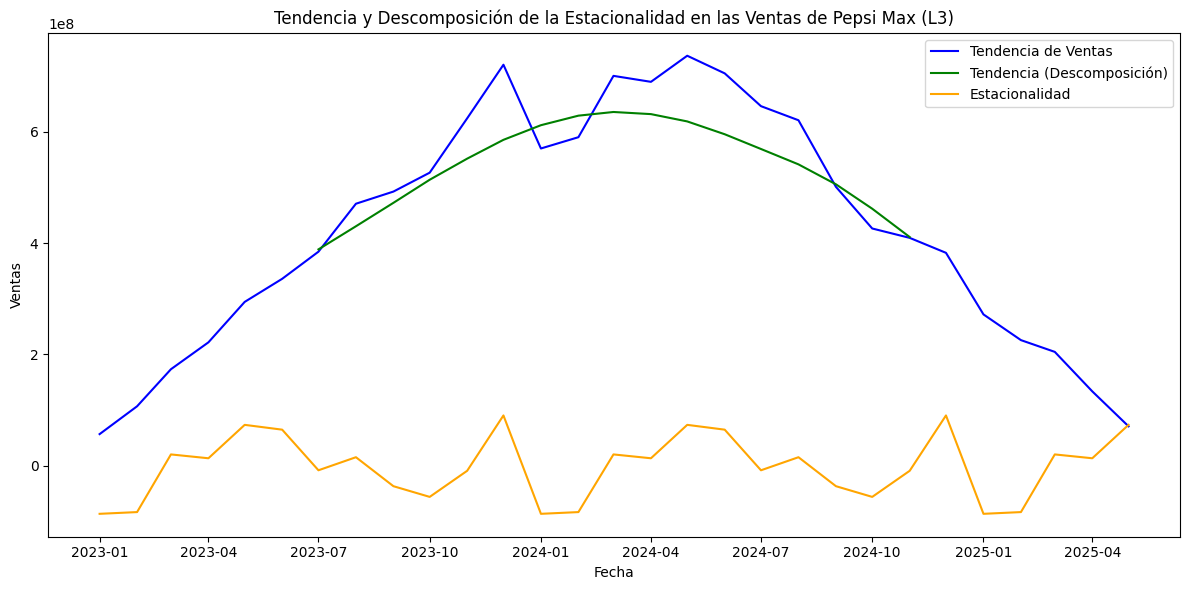

In [35]:

# Filtrar los datos para Pepsi Max (L3)
ventas_pepsimax = data[data['SUBBRAND'] == 'Pepsi Max (L3)']

# Agrupar las ventas por año y mes y sumar las cantidades
ventas_pepsimax_agrupadas = ventas_pepsimax.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

# Crear una nueva columna 'FECHA' para combinar año y mes en un solo campo de tipo fecha
ventas_pepsimax_agrupadas['FECHA'] = pd.to_datetime(
    ventas_pepsimax_agrupadas['YEAR'].astype(str) + '-' + ventas_pepsimax_agrupadas['MONTH'].astype(str) + '-01')

# Ordenar por fecha
ventas_pepsimax_agrupadas = ventas_pepsimax_agrupadas.sort_values(by='FECHA')

# Configurar el índice de la serie temporal como la columna de fecha
ventas_pepsimax_agrupadas.set_index('FECHA', inplace=True)

# Realizar descomposición estacional
result = seasonal_decompose(ventas_pepsimax_agrupadas['AMOUNT'], model='additive', period=12)

# Crear la figura para mostrar todas las líneas en una sola gráfica
plt.figure(figsize=(12, 6))

# Graficar la tendencia de ventas en España
plt.plot(ventas_pepsimax_agrupadas.index, ventas_pepsimax_agrupadas['AMOUNT'], color='blue', label='Tendencia de Ventas')

# Graficar la tendencia de la descomposición
plt.plot(result.trend, label='Tendencia (Descomposición)', color='green')

# Graficar la estacionalidad de la descomposición
plt.plot(result.seasonal, label='Estacionalidad', color='orange')

# Configuración del gráfico
plt.title('Tendencia y Descomposición de la Estacionalidad en las Ventas de Pepsi Max (L3)') # Changed title to reflect the data being used
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.tight_layout()
plt.show()

In [38]:

# Añadir la línea de ventas reales con una línea sólida y más gruesa
fig.add_trace(go.Scatter(
    x=sales_actual['DATE'],
    y=sales_actual['AMOUNT'],
    mode='lines+markers',
    name='Ventas Reales (Actual)',
    line=dict(color='blue', width=3, dash='solid')  # Línea sólida y más gruesa para ventas reales
))

# Añadir cada línea de predicción individual con diferentes estilos de línea discontinua
for forecast_type in df_forecast['FORECAST'].unique():
    forecast_data = df_forecast[df_forecast['FORECAST'] == forecast_type]
    sales_forecast = forecast_data.groupby('DATE')['AMOUNT'].sum().reset_index()

    fig.add_trace(go.Scatter(
        x=sales_forecast['DATE'],
        y=sales_forecast['AMOUNT'],
        mode='lines+markers',
        name=f'Predicción {forecast_type}',
        line=dict(dash='solid', width=1)  # Línea discontinua y más fina para predicciones
    ))

# Configuración del diseño del gráfico
fig.update_layout(
    title='Comparación de Ventas Reales vs. Predicciones Individuales (España)',
    xaxis_title='Fecha',
    yaxis_title='Cantidad Ventas',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5),
    template="plotly_white"
)

fig.show()
